# 특성공학과 규제

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

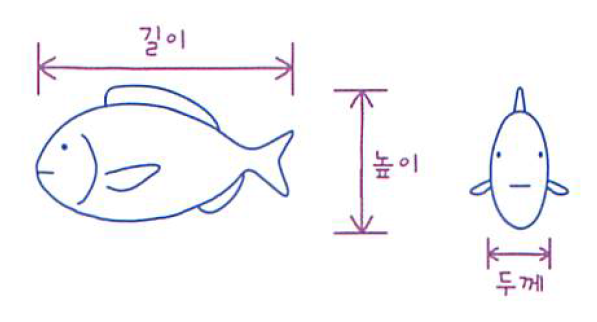

In [2]:
from IPython.display import Image
Image('../fig/hg_fish_MLR.png')

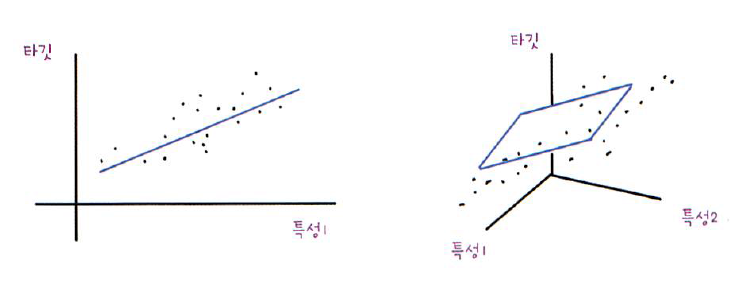

In [3]:
from IPython.display import Image
Image('../fig/hg_multiple_regression.png')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('https://bit.ly/perch_csv')
print(type(df))
# print(df)

# 판다수 DataFrame 자료를 numpy 배열로 변환
perch_full = df.to_numpy()
print(type(perch_full))

# 농어
print(perch_full)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14 

In [6]:
# http://bit.ly/perch_data

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

## Data splitting

In [7]:
from sklearn.model_selection import train_test_split

## input and target
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

## 사이킷런의 변환기
###  다항변환 (Polynomial transform)

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
# PolynomialFeatures(
#     degree=2,
#     *,
#     interaction_only=False,
#     include_bias=True,
#     order='C',
# )
# degree 2: includes x^2, y^2, xy 
# degree 3: degree 2 + x^3, y^3, xy^2, yx^2




poly = PolynomialFeatures(degree = 3)

# poly.fit: Compute number of output features.
poly.fit([[2, 3]])

# poly.transform: Transform data to polynomial features
poly.transform([[2, 3]])

print(poly.transform([[2, 3]]))

[[ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


In [10]:
# include_bias=False: Intercept를 모형에서 제거
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


### Train feature 다항변환 하기

In [11]:
train_input[:10,]**2

array([[ 384.16  ,   26.4196,    9.2416],
       [ 484.    ,   34.5744,   12.3904],
       [ 349.69  ,   27.04  ,    9.7344],
       [ 302.76  ,   21.0681,    8.6436],
       [1296.    ,  112.5721,   45.4276],
       [ 625.    ,   41.4736,   13.5424],
       [1600.    ,  142.3249,   50.5521],
       [1521.    ,  154.5049,   54.0225],
       [1849.    ,  142.3249,   52.9984],
       [ 484.    ,   31.8096,   12.3904]])

In [12]:
# mypoly = np.column_stack([train_input, train_input**2, train_input[:, 0]*train_input[:, 1], 
#                          train_input[:, 0]*train_input[:, 2], train_input[:, 1]*train_input[:, 2]])
# mypoly

In [13]:
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [14]:
print(train_poly.shape)
print(np.array(train_poly))

(42, 9)
[[  19.6       5.14      3.04    384.16    100.744    59.584    26.4196
    15.6256    9.2416]
 [  22.        5.88      3.52    484.      129.36     77.44     34.5744
    20.6976   12.3904]
 [  18.7       5.2       3.12    349.69     97.24     58.344    27.04
    16.224     9.7344]
 [  17.4       4.59      2.94    302.76     79.866    51.156    21.0681
    13.4946    8.6436]
 [  36.       10.61      6.74   1296.      381.96    242.64    112.5721
    71.5114   45.4276]
 [  25.        6.44      3.68    625.      161.       92.       41.4736
    23.6992   13.5424]
 [  40.       11.93      7.11   1600.      477.2     284.4     142.3249
    84.8223   50.5521]
 [  39.       12.43      7.35   1521.      484.77    286.65    154.5049
    91.3605   54.0225]
 [  43.       11.93      7.28   1849.      512.99    313.04    142.3249
    86.8504   52.9984]
 [  22.        5.64      3.52    484.      124.08     77.44     31.8096
    19.8528   12.3904]
 [  20.        5.08      2.77    400.      1

### 다항변환된 자료 확인하기

In [15]:
poly.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [16]:
test_poly = poly.transform(test_input)

## 다중 회귀 모델 훈련하기

In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982125


In [18]:
print(lr.score(test_poly, test_target))

0.9714559911594155


### 과적합 문제

In [19]:
poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [20]:
print(train_poly.shape)

(42, 55)


In [21]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999938143


### Negative R^2 value

In [22]:
lr.score(test_poly, test_target)

print(lr.score(test_poly, test_target))

-144.40744532797535


## 규제 (Regularization)

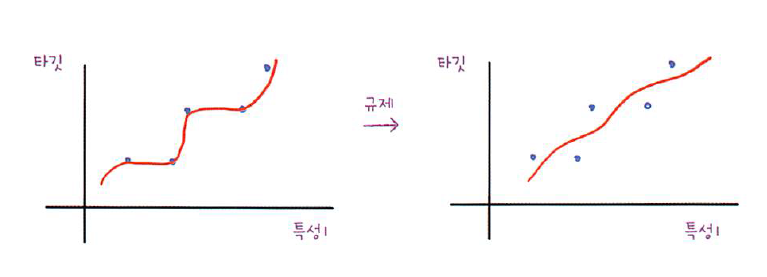

In [23]:
from IPython.display import Image
Image('../fig/hg_regularization.png')

### sklearn 을 이용하여 표준화 하기

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

## test feature와 target feature 표준화
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 릿지 (Ridge penalty)

In [25]:
from sklearn.linear_model import Ridge

## default alpha (lambda) = 1, 
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [26]:
print(ridge.score(test_scaled, test_target))

0.9790693977615386


In [27]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

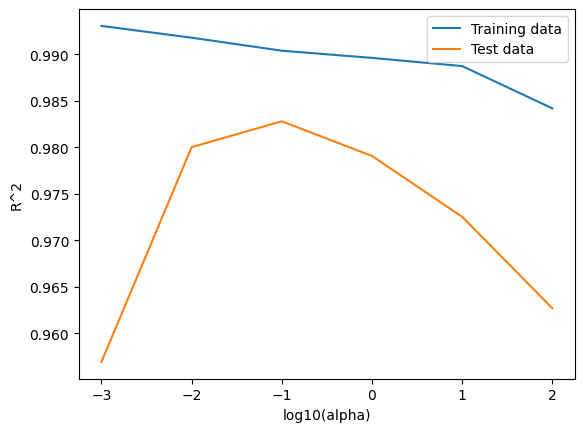

In [28]:
## np.log10(alpha_list) = -1

plt.plot(np.log10(alpha_list), train_score, label = "Training data")
plt.plot(np.log10(alpha_list), test_score, label = "Test data")
plt.legend()
plt.xlabel("log10(alpha)")
plt.ylabel("R^2")
plt.show()

In [29]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570368
0.9827976465386896


### 라쏘 (LASSO penalty)

In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [31]:
print(lasso.score(test_scaled, test_target))

0.9800593698421884


In [32]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_target))
    test_score.append(lasso.score(test_scaled, test_target))

C:\Users\user\Anaconda3\envs\mytf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18778.697957792032, tolerance: 518.2793833333334
  positive)
C:\Users\user\Anaconda3\envs\mytf\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12972.821345401393, tolerance: 518.2793833333334
  positive)


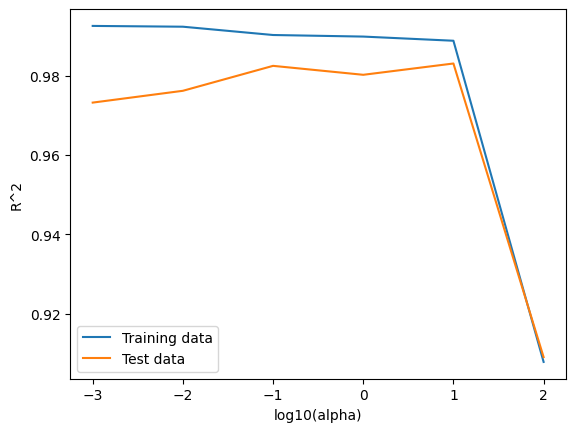

In [33]:
plt.plot(np.log10(alpha_list), train_score, label = "Training data")
plt.plot(np.log10(alpha_list), test_score, label = "Test data")
plt.legend()
plt.xlabel("log10(alpha)")
plt.ylabel("R^2")
plt.show()

In [34]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


### 계수가 0인 feature 갯수 알아보기

In [60]:
# print(np.sum(lasso.coef_ == 0))
# print(lasso.coef_)
# print(poly.get_feature_names())

# poly.get_feature_names()[lasso.coef_ == 0]
lasso.coef_ == 0
# poly.get_feature_names()[lasso.coef_ == 0]
myfeature = np.array(poly.get_feature_names())

myfeature[lasso.coef_ != 0]
np.sum(lasso.coef_ != 0)

15